In [61]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']   = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [62]:
df_US = df[df['job_country'] == 'United States']

In [63]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [64]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [65]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])  # Limit to first 3 job titles for plotting

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

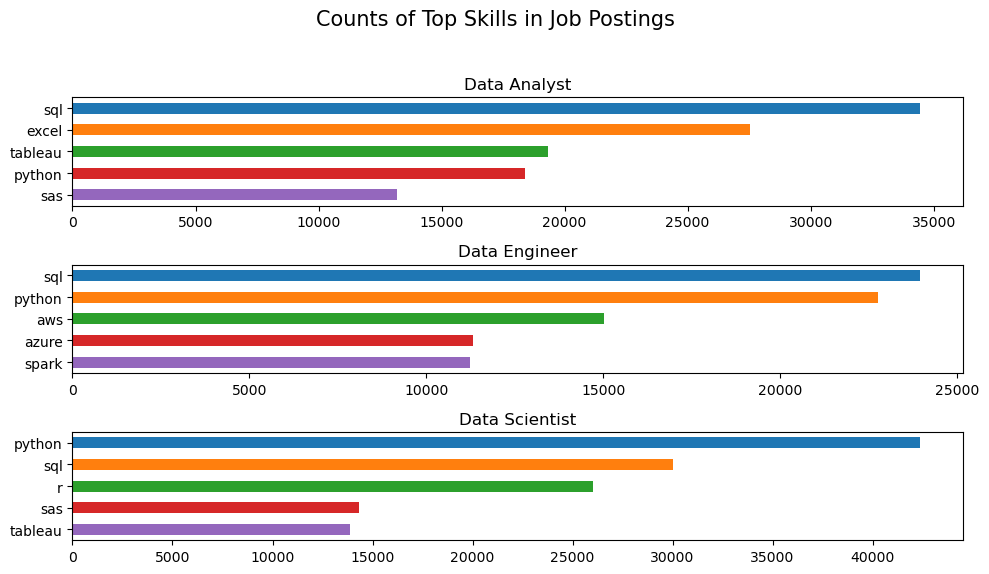

In [66]:
fig, ax = plt.subplots(len(job_titles), 1,figsize=(10, 6))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title,legend=False, color=(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']))
    ax[i].invert_yaxis()  # Invert y-axis for better readability
    ax[i].set_ylabel('')

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

    

In [67]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [68]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [69]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


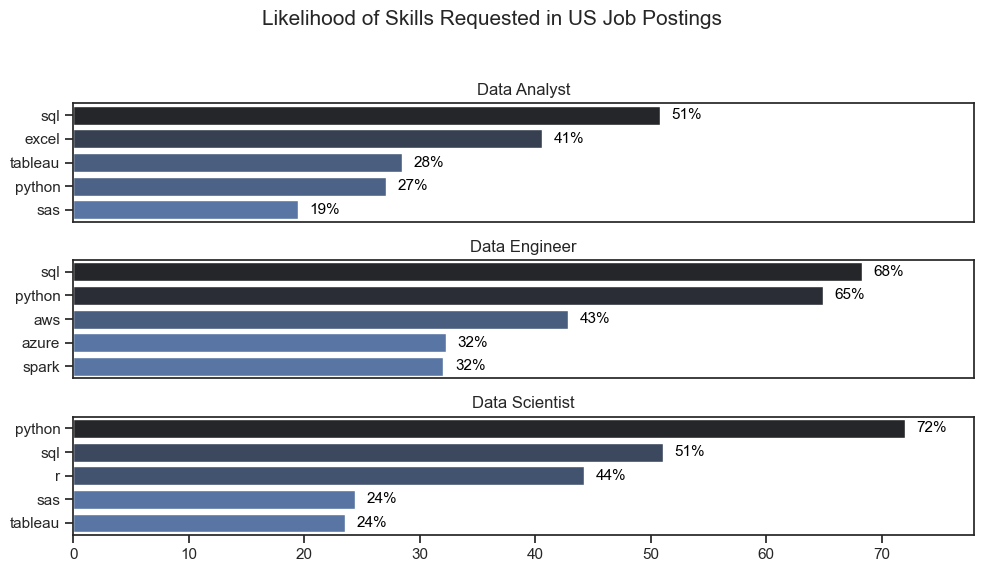

In [111]:
fig, ax = plt.subplots(len(job_titles), 1,figsize=(10, 6))

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], palette='dark:b_r', hue='skill_count', orient='h')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()  # Remove legend for cleaner look
    ax[i].set_xlim(0, 78)  # Set x-axis limit for better comparison

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f"{v:.0f}%", ha='left', va='center', color='black', fontsize=11, 
                  bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2'))
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])  # Set x-ticks for better readability

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()
